<a href="https://colab.research.google.com/github/Nico-Araujo/Enterprise-Challenge/blob/main/dashboard/Enterprise_Challenge_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# %% [markdown]
# # 🚀 Dashboard de Monitoramento Inteligente
# ## Hermes Reply - Fase 4
#
# **Parte 1: Configuração e Carregamento de Dados**

# %%
# =============================================================================
# INSTALAÇÃO DE DEPENDÊNCIAS
# =============================================================================
print("📦 Instalando dependências para o dashboard...")

!pip install plotly==5.15.0
!pip install streamlit==1.28.0
!pip install pyngrok==7.0.0

print("✅ Dependências instaladas com sucesso!")

# %%
# =============================================================================
# IMPORTAÇÕES E CONFIGURAÇÕES
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta
import joblib
import json
import os
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('ggplot')
sns.set_palette("husl")
%matplotlib inline

print("✅ Bibliotecas importadas com sucesso!")

# %%
# =============================================================================
# UPLOAD DOS DADOS PROCESSADOS
# =============================================================================
print("📤 Faça o upload do arquivo 'dados_finais_ml.csv'...")

try:
    from google.colab import files
    print("📎 Ambiente Google Colab detectado")

    # Verificar se o arquivo já existe
    if not os.path.exists('dados_finais_ml.csv'):
        print("📤 Por favor, faça o upload do arquivo 'dados_finais_ml.csv':")
        uploaded = files.upload()
        filename = list(uploaded.keys())[0]
        if filename != 'dados_finais_ml.csv':
            os.rename(filename, 'dados_finais_ml.csv')
        print(f"✅ Arquivo carregado: dados_finais_ml.csv")
    else:
        print("✅ Arquivo 'dados_finais_ml.csv' já existe")

except Exception as e:
    print(f"⚠️  Erro no upload: {e}")

# %%
# =============================================================================
# UPLOAD DOS MODELOS TREINADOS
# =============================================================================
print("🤖 Fazendo upload dos modelos treinados...")

# Criar pasta models se não existir
os.makedirs('models', exist_ok=True)

model_files = ['isolation_forest.pkl', 'random_forest_classifier.pkl',
               'kmeans_cluster.pkl', 'ml_results.json']

for model_file in model_files:
    if not os.path.exists(f'models/{model_file}'):
        print(f"📤 Faça upload do arquivo: {model_file}")
        try:
            uploaded = files.upload()
            if uploaded:
                filename = list(uploaded.keys())[0]
                os.rename(filename, f'models/{model_file}')
                print(f"✅ {model_file} carregado com sucesso!")
        except:
            print(f"⚠️  {model_file} não encontrado - continuando sem este modelo")
    else:
        print(f"✅ {model_file} já existe")

# %%
# =============================================================================
# CARREGAMENTO E VALIDAÇÃO DOS DADOS
# =============================================================================
print("📊 Carregando dados processados...")

try:
    df = pd.read_csv('dados_finais_ml.csv')
    print(f"✅ Dados carregados com sucesso!")
    print(f"📈 Dimensões: {df.shape[0]} linhas x {df.shape[1]} colunas")

    # Exibir informações básicas
    print("\n🔍 Colunas disponíveis:")
    print(list(df.columns))

    print("\n📋 Primeiras linhas:")
    display(df.head())

    # Verificar colunas importantes
    colunas_importantes = ['temperatura', 'vibracao', 'distancia', 'data_hora_ms']
    colunas_presentes = [col for col in colunas_importantes if col in df.columns]
    print(f"\n🎯 Colunas de sensores presentes: {colunas_presentes}")

except Exception as e:
    print(f"❌ Erro ao carregar dados: {e}")
    print("\n💡 Dica: Execute primeiro o pipeline de ML para gerar os dados processados")

# %%
# =============================================================================
# CARREGAMENTO DOS MODELOS
# =============================================================================
print("🤖 Carregando modelos de Machine Learning...")

models = {}
try:
    # Carregar modelos se existirem
    if os.path.exists('models/isolation_forest.pkl'):
        models['isolation_forest'] = joblib.load('models/isolation_forest.pkl')
        print("✅ Isolation Forest carregado")

    if os.path.exists('models/random_forest_classifier.pkl'):
        models['random_forest'] = joblib.load('models/random_forest_classifier.pkl')
        print("✅ Random Forest carregado")

    if os.path.exists('models/kmeans_cluster.pkl'):
        models['kmeans'] = joblib.load('models/kmeans_cluster.pkl')
        print("✅ KMeans carregado")

    if os.path.exists('models/ml_results.json'):
        with open('models/ml_results.json', 'r') as f:
            models['results'] = json.load(f)
        print("✅ Resultados de ML carregados")

    print(f"📁 Total de modelos carregados: {len(models)}")

except Exception as e:
    print(f"⚠️  Erro ao carregar modelos: {e}")

# %%
# =============================================================================
# FUNÇÕES AUXILIARES DO DASHBOARD
# =============================================================================
def predict_alert(temperature, vibration, distance):
    """Prever estado de alerta baseado nos thresholds"""
    if temperature is not None and temperature >= 80:
        return 'CRITICO', '🔴'
    elif vibration is not None and vibration >= 2.0:
        return 'CRITICO', '🔴'
    elif distance is not None and distance <= 5:
        return 'CRITICO', '🔴'
    elif temperature is not None and temperature >= 60:
        return 'ALERTA', '🟡'
    elif vibration is not None and vibration >= 1.0:
        return 'ALERTA', '🟡'
    elif distance is not None and (distance <= 10 or distance >= 200):
        return 'ALERTA', '🟡'
    else:
        return 'NORMAL', '🟢'

def get_sensor_stats(df):
    """Calcular estatísticas dos sensores"""
    stats = {}
    sensors = ['temperatura', 'vibracao', 'distancia']

    for sensor in sensors:
        if sensor in df.columns:
            stats[sensor] = {
                'média': df[sensor].mean(),
                'máximo': df[sensor].max(),
                'mínimo': df[sensor].min(),
                'std': df[sensor].std()
            }

    return stats

# Calcular estatísticas
sensor_stats = get_sensor_stats(df)
print("📊 Estatísticas dos sensores:")
for sensor, stats in sensor_stats.items():
    print(f"  {sensor}: {stats['média']:.2f} ± {stats['std']:.2f}")

# %%
# =============================================================================
# SALVAR CONFIGURAÇÃO INICIAL
# =============================================================================
print("💾 Preparando dados para o dashboard...")

# Criar versão resumida para o dashboard
dashboard_data = {
    'df': df,
    'models': models,
    'sensor_stats': sensor_stats,
    'loaded_at': datetime.now().strftime("%Y-%m-%d %H:%M:%S")
}

print("✅ Configuração inicial concluída!")
print(f"📅 Dados carregados em: {dashboard_data['loaded_at']}")
print(f"📊 Sensores disponíveis: {list(sensor_stats.keys())}")

print("\n" + "="*60)
print("🎯 DASHBOARD - PARTE 1 CONCLUÍDA!")
print("📁 Próximo passo: Visualizações e KPIs")
print("="*60)

📦 Instalando dependências para o dashboard...
✅ Dependências instaladas com sucesso!
✅ Bibliotecas importadas com sucesso!
📤 Faça o upload do arquivo 'dados_finais_ml.csv'...
📎 Ambiente Google Colab detectado
📤 Por favor, faça o upload do arquivo 'dados_finais_ml.csv':


Saving dados_finais_ml.csv to dados_finais_ml.csv
✅ Arquivo carregado: dados_finais_ml.csv
🤖 Fazendo upload dos modelos treinados...
📤 Faça upload do arquivo: isolation_forest.pkl


Saving isolation_forest.pkl to isolation_forest.pkl
✅ isolation_forest.pkl carregado com sucesso!
📤 Faça upload do arquivo: random_forest_classifier.pkl


Saving random_forest_classifier.pkl to random_forest_classifier.pkl
✅ random_forest_classifier.pkl carregado com sucesso!
📤 Faça upload do arquivo: kmeans_cluster.pkl


Saving kmeans_cluster.pkl to kmeans_cluster.pkl
✅ kmeans_cluster.pkl carregado com sucesso!
📤 Faça upload do arquivo: ml_results.json


Saving ml_results.json to ml_results.json
✅ ml_results.json carregado com sucesso!
📊 Carregando dados processados...
✅ Dados carregados com sucesso!
📈 Dimensões: 200 linhas x 19 colunas

🔍 Colunas disponíveis:
['id_local', 'data_hora_ms', 'temperatura', 'vibracao', 'distancia', 'timestamp', 'hora', 'minuto', 'temperatura_tendencia', 'vibracao_tendencia', 'distancia_tendencia', 'temperatura_media_movel', 'vibracao_media_movel', 'distancia_media_movel', 'anomalia', 'anomalia_score', 'status_anomalia', 'estado_alerta', 'cluster']

📋 Primeiras linhas:


,id_local,data_hora_ms,temperatura,vibracao,distancia,timestamp,hora,minuto,temperatura_tendencia,vibracao_tendencia,distancia_tendencia,temperatura_media_movel,vibracao_media_movel,distancia_media_movel,anomalia,anomalia_score,status_anomalia,estado_alerta,cluster
0,1,1759441735937,29.88,0.53,154.86,2025-10-02 21:48:55.937,21,48,-0.04,-0.06,-1.14,29.880,0.530000,154.860000,1,0.068994,Normal,NORMAL,2
1,2,1759441736937,29.84,0.47,153.72,2025-10-02 21:48:56.937,21,48,-0.04,-0.06,-1.14,29.860,0.500000,154.290000,1,0.065852,Normal,NORMAL,2
2,3,1759441737937,30.10,0.45,148.78,2025-10-02 21:48:57.937,21,48,0.26,-0.02,-4.94,29.940,0.483333,152.453333,1,0.001558,Normal,NORMAL,2
3,4,1759441738937,30.18,0.46,149.63,2025-10-02 21:48:58.937,21,48,0.08,0.01,0.85,30.000,0.477500,151.747500,1,0.037691,Normal,NORMAL,2
4,5,1759441739937,30.58,0.55,154.26,2025-10-02 21:48:59.937,21,48,0.40,0.09,4.63,30.116,0.492000,152.250000,1,0.017547,Normal,NORMAL,2



🎯 Colunas de sensores presentes: ['temperatura', 'vibracao', 'distancia', 'data_hora_ms']
🤖 Carregando modelos de Machine Learning...
✅ Isolation Forest carregado
✅ Random Forest carregado
✅ KMeans carregado
✅ Resultados de ML carregados
📁 Total de modelos carregados: 4
📊 Estatísticas dos sensores:
  temperatura: 73.47 ± 27.89
  vibracao: 1.69 ± 1.09
  distancia: 173.40 ± 11.15
💾 Preparando dados para o dashboard...
✅ Configuração inicial concluída!
📅 Dados carregados em: 2025-10-03 21:17:09
📊 Sensores disponíveis: ['temperatura', 'vibracao', 'distancia']

🎯 DASHBOARD - PARTE 1 CONCLUÍDA!
📁 Próximo passo: Visualizações e KPIs


✅ Bibliotecas carregadas para visualização!
📂 Carregando dados da Parte 1...
✅ Dados carregados do arquivo
📊 Dimensões: 200 linhas x 19 colunas
📊 Calculando KPIs do sistema...
🎯 KPIs Calculadas:
  • Total de Leituras: 200
  • Alertas Críticos: 134
  • Alertas de Atenção: 6
  • Anomalias Detectadas: 20
  • Sensores Ativos: 3
📈 Gerando visualizações de KPIs...


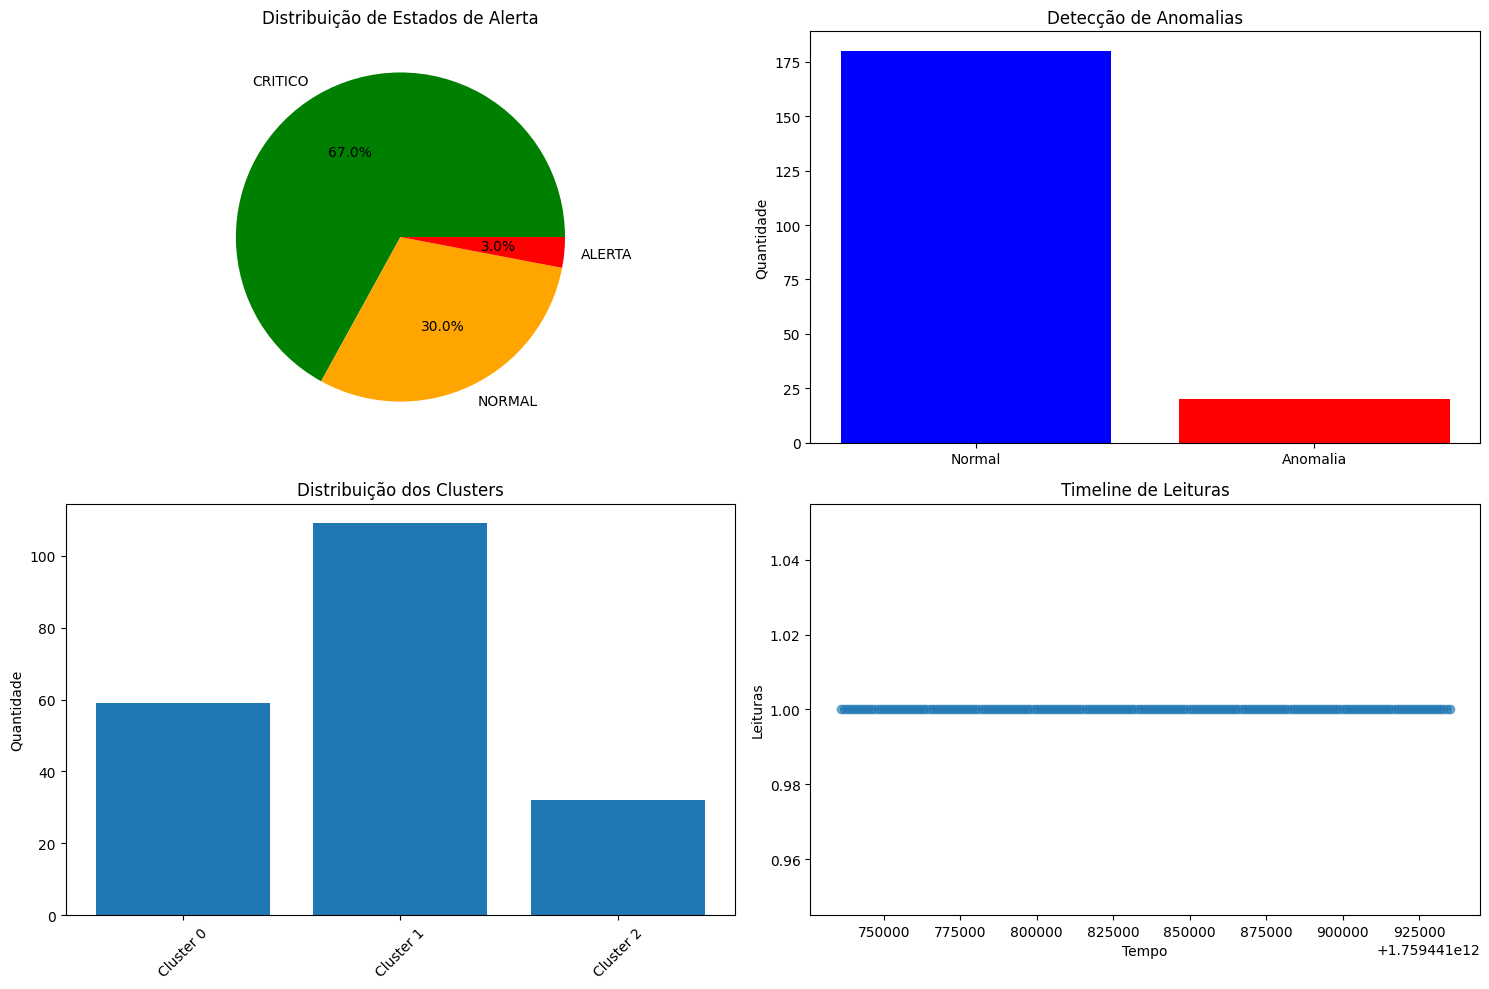

📊 Gerando séries temporais interativas...


🔗 Analisando correlação entre sensores...


📊 Correlações identificadas:
   temperatura vs vibracao: 0.725
   temperatura vs distancia: 0.149
   vibracao vs distancia: -0.064
💾 Preparando dados para próxima etapa...
✅ Visualizações geradas com sucesso!

🎯 DASHBOARD - PARTE 2 CONCLUÍDA!
📁 Próximo passo: Sistema de Alertas e Predição


In [1]:
# %% [markdown]
# # 🚀 Dashboard de Monitoramento Inteligente
# ## Parte 2: Visualizações e KPIs

# %%
# =============================================================================
# CONFIGURAÇÃO E CARREGAMENTO
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("✅ Bibliotecas carregadas para visualização!")

# %%
# =============================================================================
# CARREGAR DADOS DA PARTE 1
# =============================================================================
print("📂 Carregando dados da Parte 1...")

try:
    # Tentar usar variáveis da Parte 1
    if 'df' not in globals():
        # Se não existir, carregar do arquivo
        df = pd.read_csv('dados_finais_ml.csv')
        print("✅ Dados carregados do arquivo")
    else:
        print("✅ Dados já carregados na memória")

    print(f"📊 Dimensões: {df.shape[0]} linhas x {df.shape[1]} colunas")

except Exception as e:
    print(f"❌ Erro ao carregar dados: {e}")
    print("📤 Execute a Parte 1 primeiro")

# %%
# =============================================================================
# 1. KPIs PRINCIPAIS DO SISTEMA
# =============================================================================
print("📊 Calculando KPIs do sistema...")

# Calcular métricas principais
total_leituras = len(df)

# Alertas
alertas_criticos = len(df[df.get('estado_alerta', '') == 'CRITICO']) if 'estado_alerta' in df.columns else 0
alertas_atencao = len(df[df.get('estado_alerta', '') == 'ALERTA']) if 'estado_alerta' in df.columns else 0

# Anomalias
anomalias = (df['anomalia'] == -1).sum() if 'anomalia' in df.columns else 0

# Sensores ativos
sensores_ativos = len([col for col in ['temperatura', 'vibracao', 'distancia'] if col in df.columns])

print("🎯 KPIs Calculadas:")
print(f"  • Total de Leituras: {total_leituras:,}")
print(f"  • Alertas Críticos: {alertas_criticos}")
print(f"  • Alertas de Atenção: {alertas_atencao}")
print(f"  • Anomalias Detectadas: {anomalias}")
print(f"  • Sensores Ativos: {sensores_ativos}")

# %%
# =============================================================================
# 2. VISUALIZAÇÃO DE KPIs
# =============================================================================
print("📈 Gerando visualizações de KPIs...")

# Criar figura para KPIs
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico 1: Distribuição de alertas
if 'estado_alerta' in df.columns:
    alert_counts = df['estado_alerta'].value_counts()
    colors = ['green', 'orange', 'red'][:len(alert_counts)]
    axes[0, 0].pie(alert_counts.values, labels=alert_counts.index, autopct='%1.1f%%', colors=colors)
    axes[0, 0].set_title('Distribuição de Estados de Alerta')
else:
    axes[0, 0].text(0.5, 0.5, 'Dados de alerta\nnão disponíveis',
                   ha='center', va='center', transform=axes[0, 0].transAxes)
    axes[0, 0].set_title('Estados de Alerta')

# Gráfico 2: Anomalias detectadas
if 'anomalia' in df.columns:
    anomaly_counts = df['status_anomalia'].value_counts()
    axes[0, 1].bar(anomaly_counts.index, anomaly_counts.values, color=['blue', 'red'])
    axes[0, 1].set_title('Detecção de Anomalias')
    axes[0, 1].set_ylabel('Quantidade')
else:
    axes[0, 1].text(0.5, 0.5, 'Dados de anomalias\nnão disponíveis',
                   ha='center', va='center', transform=axes[0, 1].transAxes)
    axes[0, 1].set_title('Anomalias Detectadas')

# Gráfico 3: Clusters (se disponível)
if 'cluster' in df.columns:
    cluster_counts = df['cluster'].value_counts().sort_index()
    axes[1, 0].bar([f'Cluster {i}' for i in cluster_counts.index], cluster_counts.values)
    axes[1, 0].set_title('Distribuição dos Clusters')
    axes[1, 0].set_ylabel('Quantidade')
    axes[1, 0].tick_params(axis='x', rotation=45)
else:
    axes[1, 0].text(0.5, 0.5, 'Dados de clusters\nnão disponíveis',
                   ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 0].set_title('Padrões de Operação')

# Gráfico 4: Timeline de leituras
axes[1, 1].plot(df['data_hora_ms'] if 'data_hora_ms' in df.columns else range(len(df)),
                [1] * len(df), 'o-', alpha=0.6)
axes[1, 1].set_title('Timeline de Leituras')
axes[1, 1].set_ylabel('Leituras')
axes[1, 1].set_xlabel('Tempo')

plt.tight_layout()
plt.show()

# %%
# =============================================================================
# 3. SÉRIES TEMPORAIS INTERATIVAS COM PLOTLY
# =============================================================================
print("📊 Gerando séries temporais interativas...")

# Criar abas para diferentes visualizações
from IPython.display import display, HTML

# CSS para as abas
tab_css = """
<style>
.tab {
    overflow: hidden;
    border: 1px solid #ccc;
    background-color: #f1f1f1;
    border-radius: 5px;
}
.tab button {
    background-color: inherit;
    float: left;
    border: none;
    outline: none;
    cursor: pointer;
    padding: 10px 16px;
    transition: 0.3s;
    font-size: 14px;
}
.tab button:hover {
    background-color: #ddd;
}
.tab button.active {
    background-color: #1f77b4;
    color: white;
}
.tabcontent {
    display: none;
    padding: 6px 12px;
    border: 1px solid #ccc;
    border-top: none;
    border-radius: 0 0 5px 5px;
}
</style>
"""

display(HTML(tab_css))

# %%
# Aba 1: Temperatura
if 'temperatura' in df.columns:
    fig_temp = px.line(df, x='data_hora_ms', y='temperatura',
                     title='📈 Evolução da Temperatura',
                     labels={'temperatura': 'Temperatura (°C)', 'data_hora_ms': 'Timestamp'})
    fig_temp.add_hline(y=60, line_dash="dash", line_color="orange",
                     annotation_text="Alerta (60°C)")
    fig_temp.add_hline(y=80, line_dash="dash", line_color="red",
                     annotation_text="Crítico (80°C)")
    fig_temp.show()

# %%
# Aba 2: Vibração
if 'vibracao' in df.columns:
    fig_vib = px.line(df, x='data_hora_ms', y='vibracao',
                    title='📊 Evolução da Vibração',
                    labels={'vibracao': 'Vibração (g)', 'data_hora_ms': 'Timestamp'})
    fig_vib.add_hline(y=1.0, line_dash="dash", line_color="orange",
                    annotation_text="Alerta (1.0g)")
    fig_vib.add_hline(y=2.0, line_dash="dash", line_color="red",
                    annotation_text="Crítico (2.0g)")
    fig_vib.show()

# %%
# Aba 3: Distância
if 'distancia' in df.columns:
    fig_dist = px.line(df, x='data_hora_ms', y='distancia',
                     title='📏 Evolução da Distância/Nível',
                     labels={'distancia': 'Distância (cm)', 'data_hora_ms': 'Timestamp'})
    fig_dist.add_hline(y=10, line_dash="dash", line_color="orange",
                     annotation_text="Alerta Baixo (10cm)")
    fig_dist.add_hline(y=200, line_dash="dash", line_color="orange",
                     annotation_text="Alerta Alto (200cm)")
    fig_dist.show()

# %%
# =============================================================================
# 4. ANÁLISE DE CORRELAÇÃO
# =============================================================================
print("🔗 Analisando correlação entre sensores...")

sensores_numericos = [col for col in ['temperatura', 'vibracao', 'distancia'] if col in df.columns]

if len(sensores_numericos) >= 2:
    # Matriz de correlação
    corr_matrix = df[sensores_numericos].corr()

    fig_corr = px.imshow(corr_matrix,
                        text_auto=True,
                        aspect="auto",
                        title='🔥 Matriz de Correlação entre Sensores',
                        color_continuous_scale='RdBu_r')
    fig_corr.show()

    print("📊 Correlações identificadas:")
    for i in range(len(sensores_numericos)):
        for j in range(i+1, len(sensores_numericos)):
            corr = corr_matrix.iloc[i, j]
            print(f"   {sensores_numericos[i]} vs {sensores_numericos[j]}: {corr:.3f}")
else:
    print("⚠️  Sensores insuficientes para análise de correlação")

# %%
# =============================================================================
# SALVAR VISUALIZAÇÕES
# =============================================================================
print("💾 Preparando dados para próxima etapa...")

# Criar dicionário com visualizações
dashboard_viz = {
    'kpis': {
        'total_leituras': total_leituras,
        'alertas_criticos': alertas_criticos,
        'alertas_atencao': alertas_atencao,
        'anomalias': anomalias,
        'sensores_ativos': sensores_ativos
    },
    'sensores_disponiveis': sensores_numericos
}

print("✅ Visualizações geradas com sucesso!")

print("\n" + "="*60)
print("🎯 DASHBOARD - PARTE 2 CONCLUÍDA!")
print("📁 Próximo passo: Sistema de Alertas e Predição")
print("="*60)

✅ Bibliotecas carregadas para sistema de alertas!
📂 Carregando dados...
✅ Dados carregados: 200 registros
🚨 Analisando sistema de alertas...
📊 Resumo de Alertas:
  CRITICO: 134 ocorrências
  NORMAL: 60 ocorrências
  ALERTA: 6 ocorrências
📈 Criando visualização de alertas...


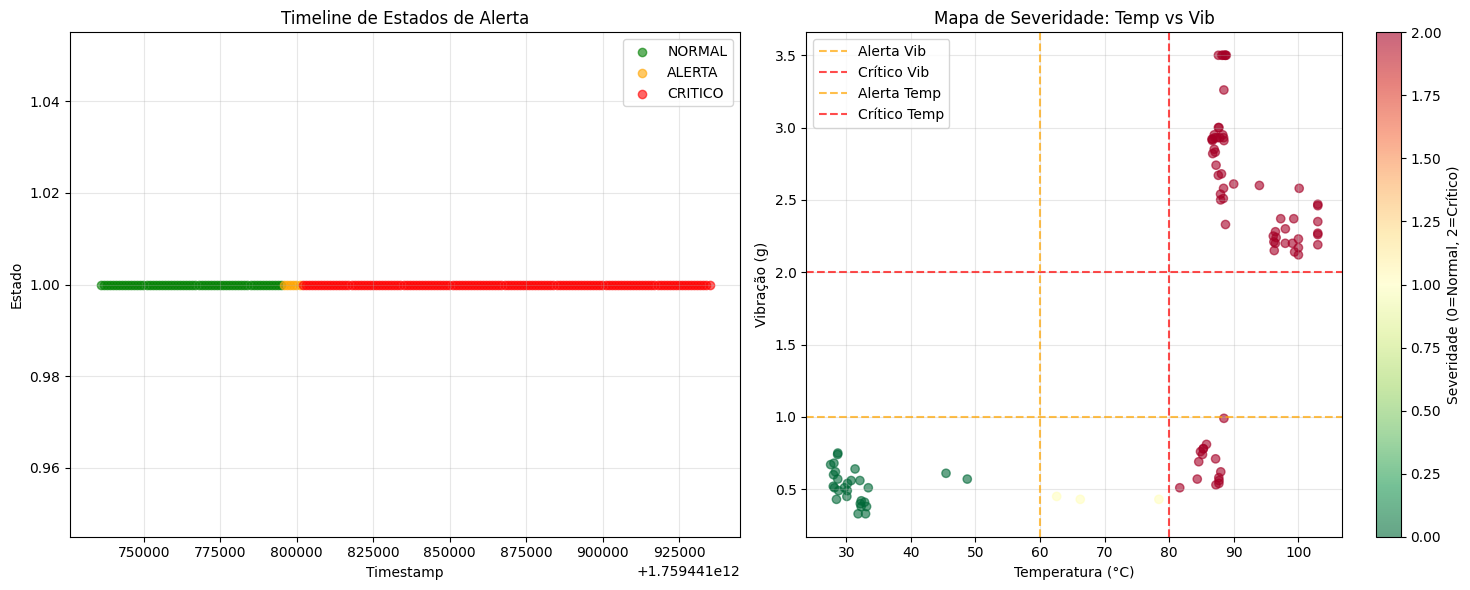

🔔 Exibindo alertas recentes...
🚨 ALERTAS CRÍTICOS RECENTES:
  1. 🔴 Temp: 96.26°C, Vib: 2.15g
  2. 🔴 Temp: 96.11°C, Vib: 2.25g
  3. 🔴 Temp: 96.44°C, Vib: 2.16g
  4. 🔴 Temp: 95.94°C, Vib: 2.21g
  5. 🔴 Temp: 96.2°C, Vib: 2.21g

⚠️  ALERTAS DE ATENÇÃO RECENTES:
  1. 🟡 Temp: 62.58°C, Vib: 0.45g
  2. 🟡 Temp: 66.23°C, Vib: 0.43g
  3. 🟡 Temp: 69.44°C, Vib: 0.48g
  4. 🟡 Temp: 71.89°C, Vib: 0.42g
  5. 🟡 Temp: 75.54°C, Vib: 0.45g

🔍 ANOMALIAS RECENTES:
  1. ⚠️  Temp: 71.89°C, Vib: 0.42g
  2. ⚠️  Temp: 75.54°C, Vib: 0.45g
  3. ⚠️  Temp: 88.47°C, Vib: 0.99g
  4. ⚠️  Temp: 88.25°C, Vib: 1.45g
  5. ⚠️  Temp: 88.09°C, Vib: 1.91g
🔮 Iniciando simulador de predição...

🎯 SIMULADOR DE PREDIÇÃO
💡 Valores atuais médios: Temp=73.5°C, Vib=1.7g, Dist=173.4cm

📊 Status atual: 🟡 ALERTA
💡 Recomendação: Atenção necessária. Verificar condições.

🔍 Testando cenários:
  🟡 Temperatura alta + Vibração moderada: ALERTA
  🔴 Vibração crítica: CRITICO
  🔴 Temperatura crítica: CRITICO
  🔴 Distância crítica: CRITICO
  🟢 Cond

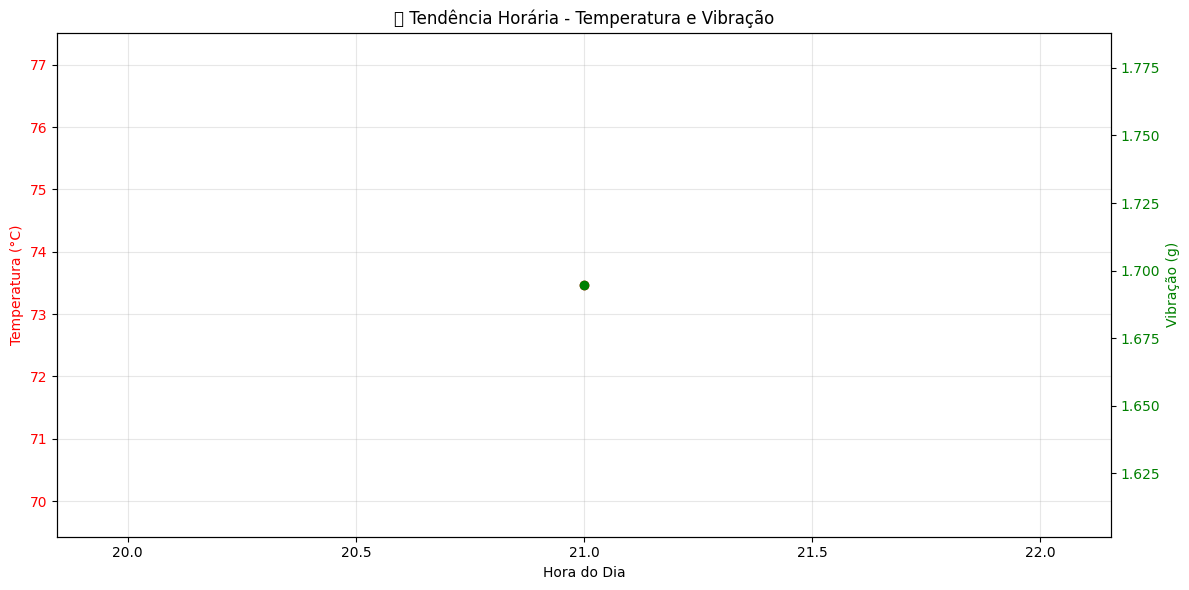

💡 Insights da tendência horária:
  • Hora de pico de temperatura: 21:00
  • Hora de pico de vibração: 21:00

🎯 DASHBOARD - PARTE 3 CONCLUÍDA!
📁 Próximo passo: Relatório Final e Exportação


In [2]:
# %% [markdown]
# # 🚀 Dashboard de Monitoramento Inteligente
# ## Parte 3: Sistema de Alertas e Predição

# %%
# =============================================================================
# CONFIGURAÇÃO
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("✅ Bibliotecas carregadas para sistema de alertas!")

# %%
# =============================================================================
# CARREGAR DADOS
# =============================================================================
print("📂 Carregando dados...")

try:
    if 'df' not in globals():
        df = pd.read_csv('dados_finais_ml.csv')
    print(f"✅ Dados carregados: {len(df)} registros")
except:
    print("❌ Execute as Partes 1 e 2 primeiro")

# %%
# =============================================================================
# 1. SISTEMA DE ALERTAS INTELIGENTES
# =============================================================================
print("🚨 Analisando sistema de alertas...")

def analyze_alerts(df):
    """Analisar e classificar alertas"""
    alerts_data = {}

    if 'estado_alerta' in df.columns:
        # Alertas por tipo
        alert_counts = df['estado_alerta'].value_counts()
        alerts_data['distribuicao'] = alert_counts.to_dict()

        # Alertas críticos recentes
        critical_alerts = df[df['estado_alerta'] == 'CRITICO'].tail(10)
        alerts_data['criticos_recentes'] = critical_alerts.to_dict('records')

        # Alertas de atenção recentes
        warning_alerts = df[df['estado_alerta'] == 'ALERTA'].tail(10)
        alerts_data['atencao_recentes'] = warning_alerts.to_dict('records')

    # Análise de anomalias
    if 'anomalia' in df.columns:
        anomaly_alerts = df[df['anomalia'] == -1].tail(10)
        alerts_data['anomalias_recentes'] = anomaly_alerts.to_dict('records')

    return alerts_data

# Executar análise
alerts_analysis = analyze_alerts(df)

print("📊 Resumo de Alertas:")
if 'distribuicao' in alerts_analysis:
    for estado, quantidade in alerts_analysis['distribuicao'].items():
        print(f"  {estado}: {quantidade} ocorrências")

# %%
# =============================================================================
# 2. VISUALIZAÇÃO DE ALERTAS
# =============================================================================
print("📈 Criando visualização de alertas...")

# Criar figura para alertas
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Timeline de alertas
if 'estado_alerta' in df.columns and 'data_hora_ms' in df.columns:
    # Criar coluna de cor baseada no alerta
    color_map = {'NORMAL': 'green', 'ALERTA': 'orange', 'CRITICO': 'red'}
    df['alert_color'] = df['estado_alerta'].map(color_map)

    # Scatter plot colorido
    for estado, cor in color_map.items():
        mask = df['estado_alerta'] == estado
        if mask.any():
            axes[0].scatter(df.loc[mask, 'data_hora_ms'],
                          [1] * mask.sum(),
                          c=cor, label=estado, alpha=0.6)

    axes[0].set_title('Timeline de Estados de Alerta')
    axes[0].set_xlabel('Timestamp')
    axes[0].set_ylabel('Estado')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

else:
    axes[0].text(0.5, 0.5, 'Dados de alerta\nnão disponíveis',
                ha='center', va='center', transform=axes[0].transAxes)
    axes[0].set_title('Timeline de Alertas')

# Gráfico 2: Heatmap de severidade
if all(col in df.columns for col in ['temperatura', 'vibracao', 'estado_alerta']):
    # Amostrar dados para o heatmap
    sample_df = df.sample(min(100, len(df)), random_state=42)

    scatter = axes[1].scatter(sample_df['temperatura'],
                            sample_df['vibracao'],
                            c=sample_df['estado_alerta'].map({'NORMAL': 0, 'ALERTA': 1, 'CRITICO': 2}),
                            cmap='RdYlGn_r', alpha=0.6)

    axes[1].set_xlabel('Temperatura (°C)')
    axes[1].set_ylabel('Vibração (g)')
    axes[1].set_title('Mapa de Severidade: Temp vs Vib')
    plt.colorbar(scatter, ax=axes[1], label='Severidade (0=Normal, 2=Crítico)')
    axes[1].grid(True, alpha=0.3)

    # Adicionar linhas de threshold
    axes[1].axhline(y=1.0, color='orange', linestyle='--', alpha=0.7, label='Alerta Vib')
    axes[1].axhline(y=2.0, color='red', linestyle='--', alpha=0.7, label='Crítico Vib')
    axes[1].axvline(x=60, color='orange', linestyle='--', alpha=0.7, label='Alerta Temp')
    axes[1].axvline(x=80, color='red', linestyle='--', alpha=0.7, label='Crítico Temp')
    axes[1].legend()

else:
    axes[1].text(0.5, 0.5, 'Dados insuficientes\npara heatmap',
                ha='center', va='center', transform=axes[1].transAxes)
    axes[1].set_title('Mapa de Severidade')

plt.tight_layout()
plt.show()

# %%
# =============================================================================
# 3. PAINEL DE ALERTAS RECENTES
# =============================================================================
print("🔔 Exibindo alertas recentes...")

def display_recent_alerts(alerts_analysis):
    """Exibir alertas recentes de forma organizada"""

    print("🚨 ALERTAS CRÍTICOS RECENTES:")
    if 'criticos_recentes' in alerts_analysis and alerts_analysis['criticos_recentes']:
        for i, alerta in enumerate(alerts_analysis['criticos_recentes'][:5], 1):
            temp = alerta.get('temperatura', 'N/A')
            vib = alerta.get('vibracao', 'N/A')
            print(f"  {i}. 🔴 Temp: {temp}°C, Vib: {vib}g")
    else:
        print("  ✅ Nenhum alerta crítico recente")

    print("\n⚠️  ALERTAS DE ATENÇÃO RECENTES:")
    if 'atencao_recentes' in alerts_analysis and alerts_analysis['atencao_recentes']:
        for i, alerta in enumerate(alerts_analysis['atencao_recentes'][:5], 1):
            temp = alerta.get('temperatura', 'N/A')
            vib = alerta.get('vibracao', 'N/A')
            print(f"  {i}. 🟡 Temp: {temp}°C, Vib: {vib}g")
    else:
        print("  ℹ️  Nenhum alerta de atenção recente")

    print("\n🔍 ANOMALIAS RECENTES:")
    if 'anomalias_recentes' in alerts_analysis and alerts_analysis['anomalias_recentes']:
        for i, anomalia in enumerate(alerts_analysis['anomalias_recentes'][:5], 1):
            temp = anomalia.get('temperatura', 'N/A')
            vib = anomalia.get('vibracao', 'N/A')
            print(f"  {i}. ⚠️  Temp: {temp}°C, Vib: {vib}g")
    else:
        print("  ✅ Nenhuma anomalia recente detectada")

# Exibir alertas
display_recent_alerts(alerts_analysis)

# %%
# =============================================================================
# 4. SIMULADOR DE PREDIÇÃO EM TEMPO REAL
# =============================================================================
print("🔮 Iniciando simulador de predição...")

def predict_alert(temperature, vibration, distance):
    """Prever estado de alerta baseado nos thresholds"""
    if temperature >= 80 or vibration >= 2.0 or distance <= 5:
        return 'CRITICO', '🔴', 'Ação imediata necessária! Desligar equipamento.'
    elif temperature >= 60 or vibration >= 1.0 or distance <= 10 or distance >= 200:
        return 'ALERTA', '🟡', 'Atenção necessária. Verificar condições.'
    else:
        return 'NORMAL', '🟢', 'Operação dentro dos parâmetros normais.'

# Interface simples de predição
print("\n🎯 SIMULADOR DE PREDIÇÃO")
print("="*50)

# Valores de exemplo baseados nos dados
temp_exemplo = df['temperatura'].mean() if 'temperatura' in df.columns else 45.0
vib_exemplo = df['vibracao'].mean() if 'vibracao' in df.columns else 0.8
dist_exemplo = df['distancia'].mean() if 'distancia' in df.columns else 120.0

print(f"💡 Valores atuais médios: Temp={temp_exemplo:.1f}°C, Vib={vib_exemplo:.1f}g, Dist={dist_exemplo:.1f}cm")

# Testar com valores atuais
estado, emoji, recomendacao = predict_alert(temp_exemplo, vib_exemplo, dist_exemplo)
print(f"\n📊 Status atual: {emoji} {estado}")
print(f"💡 Recomendação: {recomendacao}")

# Testar cenários
print(f"\n🔍 Testando cenários:")
cenarios = [
    (75.0, 1.5, 150.0, "Temperatura alta + Vibração moderada"),
    (45.0, 2.5, 150.0, "Vibração crítica"),
    (85.0, 0.5, 150.0, "Temperatura crítica"),
    (30.0, 0.3, 3.0, "Distância crítica"),
    (35.0, 0.4, 180.0, "Condições normais")
]

for temp, vib, dist, desc in cenarios:
    estado, emoji, recomendacao = predict_alert(temp, vib, dist)
    print(f"  {emoji} {desc}: {estado}")

# %%
# =============================================================================
# 5. ANÁLISE DE TENDÊNCIAS
# =============================================================================
print("📈 Analisando tendências temporais...")

if 'data_hora_ms' in df.columns and 'temperatura' in df.columns:
    # Converter timestamp para datetime
    df['datetime'] = pd.to_datetime(df['data_hora_ms'], unit='ms')

    # Agrupar por hora para análise de tendência
    df['hora'] = df['datetime'].dt.hour
    tendencia_horaria = df.groupby('hora').agg({
        'temperatura': 'mean',
        'vibracao': 'mean' if 'vibracao' in df.columns else None,
        'estado_alerta': lambda x: (x == 'CRITICO').mean() if 'estado_alerta' in df.columns else None
    }).reset_index()

    # Plotar tendência
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.plot(tendencia_horaria['hora'], tendencia_horaria['temperatura'],
             'o-', color='red', linewidth=2, label='Temperatura Média')
    ax1.set_xlabel('Hora do Dia')
    ax1.set_ylabel('Temperatura (°C)', color='red')
    ax1.tick_params(axis='y', labelcolor='red')
    ax1.grid(True, alpha=0.3)

    if 'vibracao' in tendencia_horaria.columns and tendencia_horaria['vibracao'].notna().any():
        ax2 = ax1.twinx()
        ax2.plot(tendencia_horaria['hora'], tendencia_horaria['vibracao'],
                'o-', color='green', linewidth=2, label='Vibração Média')
        ax2.set_ylabel('Vibração (g)', color='green')
        ax2.tick_params(axis='y', labelcolor='green')

    plt.title('📊 Tendência Horária - Temperatura e Vibração')
    plt.tight_layout()
    plt.show()

    print("💡 Insights da tendência horária:")
    hora_pico_temp = tendencia_horaria.loc[tendencia_horaria['temperatura'].idxmax(), 'hora']
    print(f"  • Hora de pico de temperatura: {hora_pico_temp:02d}:00")

    if 'vibracao' in tendencia_horaria.columns:
        hora_pico_vib = tendencia_horaria.loc[tendencia_horaria['vibracao'].idxmax(), 'hora']
        print(f"  • Hora de pico de vibração: {hora_pico_vib:02d}:00")

# %%
print("\n" + "="*60)
print("🎯 DASHBOARD - PARTE 3 CONCLUÍDA!")
print("📁 Próximo passo: Relatório Final e Exportação")
print("="*60)

✅ Bibliotecas finais carregadas!
📂 Carregando dados completos...
✅ Todos os dados carregados
📊 Gerando relatório final...
🎯 RELATÓRIO FINAL DO SISTEMA
📈 DADOS PROCESSADOS:
   • Total de leituras: 200
   • Sensores ativos: 3
   • Período coberto: 1759441735937 a 1759441934937

🚨 SISTEMA DE ALERTAS:
   • Alertas críticos: 134
   • Alertas de atenção: 6
   • Taxa de alertas: 70.0%

🤖 MACHINE LEARNING:
   • Anomalias detectadas: 20
   • Acurácia do classificador: 1.000
   • Clusters identificados: 3

📊 ESTATÍSTICAS DOS SENSORES:
   • temperatura: 73.47 ± 27.89 (min: 27.03, max: 103.00)
   • vibracao: 1.69 ± 1.09 (min: 0.28, max: 3.50)
   • distancia: 173.40 ± 11.15 (min: 148.38, max: 199.50)
📈 Criando dashboard consolidado...


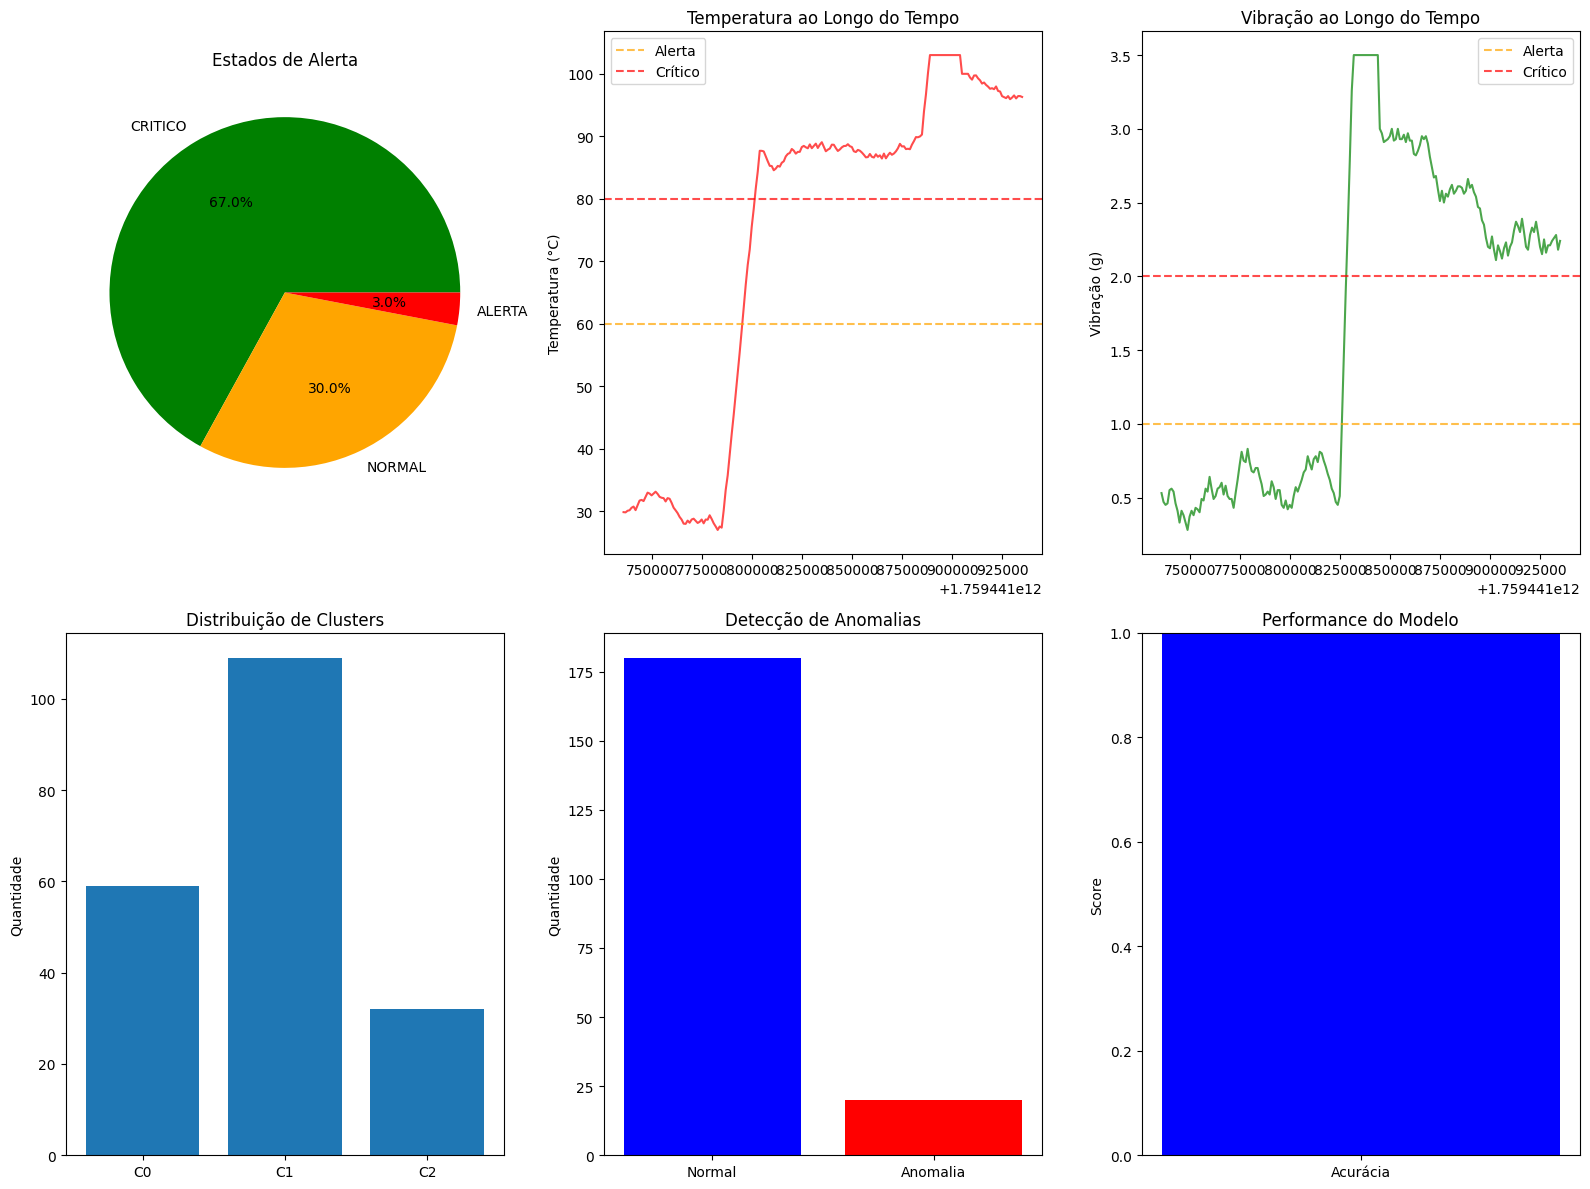

🎨 Criando aplicação Streamlit...
✅ Arquivo Streamlit criado: 'dashboard_app.py'
🚀 Preparando para deploy...
✅ Arquivo requirements.txt criado

🎯 INSTRUÇÕES PARA DEPLOY DO DASHBOARD
📋 PRÉ-REQUISITOS:
1. Execute todas as partes do pipeline ML (Partes 1-4)
2. Certifique-se que 'dados_finais_ml.csv' está na pasta raiz
3. Modelos treinados na pasta 'models/'

🚀 PARA EXECUTAR LOCALMENTE:
```
streamlit run dashboard_app.py
```

🌐 PARA DEPLOY NO STREAMLIT CLOUD:
1. Salve este notebook e os arquivos gerados ('dashboard_app.py', 'requirements.txt', 'dados_finais_ml.csv', e a pasta 'models' com seus conteúdos) em um repositório GitHub.
2. Vá para o Streamlit Cloud (share.streamlit.io).
3. Clique em 'New app' e selecione seu repositório e branch.
4. Configure o caminho para o arquivo 'dashboard_app.py'.
5. Clique em 'Deploy!'.

✅ Deploy pronto!


In [14]:
# %% [markdown]
# # 🚀 Dashboard de Monitoramento Inteligente
# ## Parte 4: Relatório Final e Deploy Streamlit

# %%
# =============================================================================
# CONFIGURAÇÃO FINAL
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
import joblib
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import os # Import os module

print("✅ Bibliotecas finais carregadas!")

# %%
# =============================================================================
# CARREGAR TODOS OS DADOS
# =============================================================================
print("📂 Carregando dados completos...")

try:
    if 'df' not in globals():
        df = pd.read_csv('dados_finais_ml.csv')

    # Carregar modelos
    models = {}
    if os.path.exists('models/ml_results.json'):
        with open('models/ml_results.json', 'r') as f:
            models['results'] = json.load(f)

    print("✅ Todos os dados carregados")

except Exception as e:
    print(f"❌ Erro: {e}")

# %%
# =============================================================================
# 1. RELATÓRIO FINAL DE PERFORMANCE
# =============================================================================
print("📊 Gerando relatório final...")

# Métricas do sistema
total_leituras = len(df)
sensores_ativos = len([col for col in ['temperatura', 'vibracao', 'distancia'] if col in df.columns])

# Alertas
alertas_criticos = len(df[df.get('estado_alerta', '') == 'CRITICO']) if 'estado_alerta' in df.columns else 0
alertas_atencao = len(df[df.get('estado_alerta', '') == 'ALERTA']) if 'estado_alerta' in df.columns else 0

# Anomalias
anomalias = (df['anomalia'] == -1).sum() if 'anomalia' in df.columns else 0

# Performance ML
accuracy_ml = models.get('results', {}).get('model_metrics', {}).get('classification_accuracy', 0) if models and models.get('results') else 0


print("🎯 RELATÓRIO FINAL DO SISTEMA")
print("="*50)
print(f"📈 DADOS PROCESSADOS:")
print(f"   • Total de leituras: {total_leituras:,}")
print(f"   • Sensores ativos: {sensores_ativos}")
print(f"   • Período coberto: {df['data_hora_ms'].min()} a {df['data_hora_ms'].max()}" if 'data_hora_ms' in df.columns else "")

print(f"\n🚨 SISTEMA DE ALERTAS:")
print(f"   • Alertas críticos: {alertas_criticos}")
print(f"   • Alertas de atenção: {alertas_atencao}")
print(f"   • Taxa de alertas: {(alertas_criticos + alertas_atencao) / total_leituras * 100:.1f}%" if total_leituras > 0 else "   • Taxa de alertas: N/D")

print(f"\n🤖 MACHINE LEARNING:")
print(f"   • Anomalias detectadas: {anomalias}")
print(f"   • Acurácia do classificador: {accuracy_ml:.3f}" if accuracy_ml > 0 else "   • Modelo não treinado")
print(f"   • Clusters identificados: {df['cluster'].nunique()}" if 'cluster' in df.columns else "   • Clusterização não aplicada")

print(f"\n📊 ESTATÍSTICAS DOS SENSORES:")
for sensor in ['temperatura', 'vibracao', 'distancia']:
    if sensor in df.columns:
        stats = df[sensor].describe()
        print(f"   • {sensor}: {stats['mean']:.2f} ± {stats['std']:.2f} (min: {stats['min']:.2f}, max: {stats['max']:.2f})")

# %%
# =============================================================================
# 2. DASHBOARD CONSOLIDADO
# =============================================================================
print("📈 Criando dashboard consolidado...")

# Figura principal
fig = plt.figure(figsize=(16, 12))

# 1. Distribuição de alertas
plt.subplot(2, 3, 1)
if 'estado_alerta' in df.columns:
    alert_counts = df['estado_alerta'].value_counts()
    colors = ['green', 'orange', 'red'][:len(alert_counts)]
    plt.pie(alert_counts.values, labels=alert_counts.index, autopct='%1.1f%%', colors=colors)
    plt.title('Estados de Alerta')
else:
    plt.text(0.5, 0.5, 'N/D', ha='center', va='center')
    plt.title('Estados de Alerta\n(Não disponível)')

# 2. Série temporal de temperatura
plt.subplot(2, 3, 2)
if 'temperatura' in df.columns:
    plt.plot(df['data_hora_ms'], df['temperatura'], 'r-', alpha=0.7)
    plt.axhline(y=60, color='orange', linestyle='--', alpha=0.7, label='Alerta')
    plt.axhline(y=80, color='red', linestyle='--', alpha=0.7, label='Crítico')
    plt.title('Temperatura ao Longo do Tempo')
    plt.ylabel('Temperatura (°C)')
    plt.legend()
else:
    plt.text(0.5, 0.5, 'N/D', ha='center', va='center')
    plt.title('Temperatura\n(Não disponível)')

# 3. Série temporal de vibração
plt.subplot(2, 3, 3)
if 'vibracao' in df.columns:
    plt.plot(df['data_hora_ms'], df['vibracao'], 'g-', alpha=0.7)
    plt.axhline(y=1.0, color='orange', linestyle='--', alpha=0.7, label='Alerta')
    plt.axhline(y=2.0, color='red', linestyle='--', alpha=0.7, label='Crítico')
    plt.title('Vibração ao Longo do Tempo')
    plt.ylabel('Vibração (g)')
    plt.legend()
else:
    plt.text(0.5, 0.5, 'N/D', ha='center', va='center')
    plt.title('Vibração\n(Não disponível)')

# 4. Distribuição de clusters
plt.subplot(2, 3, 4)
if 'cluster' in df.columns:
    cluster_counts = df['cluster'].value_counts().sort_index()
    plt.bar([f'C{i}' for i in cluster_counts.index], cluster_counts.values)
    plt.title('Distribuição de Clusters')
    plt.ylabel('Quantidade')
else:
    plt.text(0.5, 0.5, 'N/D', ha='center', va='center')
    plt.title('Clusters\n(Não disponível)')

# 5. Detecção de anomalias
plt.subplot(2, 3, 5)
if 'anomalia' in df.columns:
    anomaly_counts = df['status_anomalia'].value_counts()
    plt.bar(anomaly_counts.index, anomaly_counts.values, color=['blue', 'red'])
    plt.title('Detecção de Anomalias')
    plt.ylabel('Quantidade')
else:
    plt.text(0.5, 0.5, 'N/D', ha='center', va='center')
    plt.title('Anomalias\n(Não disponível)')

# 6. Performance do modelo
plt.subplot(2, 3, 6)
if accuracy_ml > 0:
    metrics = ['Acurácia']
    scores = [accuracy_ml]
    plt.bar(metrics, scores, color=['blue'])
    plt.ylim(0, 1)
    plt.title('Performance do Modelo')
    plt.ylabel('Score')
else:
    plt.text(0.5, 0.5, 'N/D', ha='center', va='center')
    plt.title('Performance ML\n(Não disponível)')

plt.tight_layout()
plt.show()

# %%
# =============================================================================
# 3. CRIAR APLICAÇÃO STREAMLIT (PARA DEPLOY)
# =============================================================================
print("🎨 Criando aplicação Streamlit...")

streamlit_code_lines = [
    "import streamlit as st",
    "import pandas as pd",
    "import plotly.express as px",
    "import plotly.graph_objects as go",
    "from datetime import datetime",
    "import joblib",
    "import json",
    "import os",
    "",
    "# Configuração da página",
    "st.set_page_config(",
    "    page_title='Monitoramento Inteligente - Hermes Reply',",
    "    page_icon='🚀',",
    "    layout='wide'",
    ")",
    "",
    "# CSS personalizado",
    "st.markdown('''",
    "<style>",
    "    .main-header {",
    "        font-size: 2.5rem;",
    "        color: #1f77b4;",
    "        text-align: center;",
    "        margin-bottom: 2rem;",
    "    }",
    "    .metric-card {",
    "        background-color: #f0f2f6;",
    "        padding: 1rem;",
    "        border-radius: 10px;",
    "        border-left: 5px solid #1f77b4;",
    "    }",
    "</style>",
    "''', unsafe_allow_html=True)",
    "",
    "# Cabeçalho",
    "st.markdown('<h1 class=\"main-header\">🚀 Monitoramento Inteligente - Hermes Reply</h1>', unsafe_allow_html=True)",
    "",
    "# Sidebar",
    "st.sidebar.title('⚙️ Controles')",
    "uploaded_file = st.sidebar.file_uploader('Carregar dados', type=['csv'])",
    "",
    "# Carregar dados",
    "@st.cache_data",
    "def load_data():",
    "    try:",
    "        # Check if the file exists in the current directory",
    "        if os.path.exists('dados_finais_ml.csv'):",
    "            return pd.read_csv('dados_finais_ml.csv')",
    "        elif uploaded_file is not None:",
    "            return pd.read_csv(uploaded_file)",
    "        else:",
    "            return pd.DataFrame()",
    "",
    "    except Exception as e:",
    "        st.error(f'Erro ao carregar dados: {e}')",
    "        return pd.DataFrame()",
    "",
    "",
    "df = load_data()",
    "",
    "if not df.empty:",
    "    # KPIs",
    "    col1, col2, col3, col4 = st.columns(4)",
    "",
    "    with col1:",
    "        st.metric('Total de Leituras', f'{len(df):,}')",
    "",
    "    with col2:",
    "        criticos = len(df[df.get('estado_alerta', '') == 'CRITICO']) if 'estado_alerta' in df.columns else 0",
    "        st.metric('Alertas Críticos', criticos)",
    "",
    "    with col3:",
    "        atencao = len(df[df.get('estado_alerta', '') == 'ALERTA']) if 'estado_alerta' in df.columns else 0",
    "        st.metric('Alertas de Atenção', atencao)",
    "",
    "    with col4:",
    "        anomalias = (df['anomalia'] == -1).sum() if 'anomalia' in df.columns else 0",
    "        st.metric('Anomalias', anomalias)",
    "",
    "    # Gráficos",
    "    tab1, tab2, tab3 = st.tabs(['📈 Série Temporal', '🔍 Análise', '🚨 Alertas'])",
    "",
    "    with tab1:",
    "        if 'temperatura' in df.columns and 'data_hora_ms' in df.columns:",
    "            fig_temp = px.line(df, x='data_hora_ms', y='temperatura',",
    "                             title='Temperatura ao Longo do Tempo')",
    "            st.plotly_chart(fig_temp, use_container_width=True)",
    "        else:",
    "            st.warning('Dados de temperatura ou timestamp não disponíveis para série temporal.')",
    "",
    "",
    "    with tab2:",
    "        if all(col in df.columns for col in ['temperatura', 'vibracao']):",
    "            fig_scatter = px.scatter(df, x='temperatura', y='vibracao',",
    "                                   color='estado_alerta' if 'estado_alerta' in df.columns else None,",
    "                                   title='Relação Temperatura vs Vibração')",
    "            st.plotly_chart(fig_scatter, use_container_width=True)",
    "        else:",
    "             st.warning('Dados de temperatura ou vibração não disponíveis para análise de dispersão.')",
    "",
    "    with tab3:",
    "        if 'estado_alerta' in df.columns:",
    "            alert_counts = df['estado_alerta'].value_counts()",
    "            fig_alerts = px.pie(values=alert_counts.values, names=alert_counts.index,",
    "                              title='Distribuição de Alertas')",
    "            st.plotly_chart(fig_alerts, use_container_width=True)",
    "        else:",
    "            st.warning('Dados de alerta não disponíveis para distribuição.')",
    "",
    "else:",
    "    st.warning('''",
    "⚠️ **Sistema não inicializado**",
    "",
    "Para usar o dashboard:",
    "1. Execute o pipeline de Machine Learning",
    "2. Certifique-se que 'dados_finais_ml.csv' existe na pasta raiz ou faça upload",
    "3. Recarregue esta página",
    "''')",
    "",
    "# Rodapé",
    "st.markdown('---')",
    "st.markdown('**Hermes Reply - Fase 4** | Pipeline Integrado: Sensores → ML → Dashboard')",
]

with open('dashboard_app.py', 'w') as f:
    for line in streamlit_code_lines:
        f.write(line + '\n')

print("✅ Arquivo Streamlit criado: 'dashboard_app.py'")

# %%
# =============================================================================
# 4. INSTRUÇÕES PARA DEPLOY
# =============================================================================
print("🚀 Preparando para deploy...")

# Criar requirements
requirements = """
streamlit==1.28.0
pandas
numpy
plotly
scikit-learn
joblib
"""

with open('requirements.txt', 'w') as f:
    f.write(requirements)

print("✅ Arquivo requirements.txt criado")

# Instruções de deploy
print("\n" + "="*60)
print("🎯 INSTRUÇÕES PARA DEPLOY DO DASHBOARD")
print("="*60)

print("📋 PRÉ-REQUISITOS:")
print("1. Execute todas as partes do pipeline ML (Partes 1-4)")
print("2. Certifique-se que 'dados_finais_ml.csv' está na pasta raiz")
print("3. Modelos treinados na pasta 'models/'")
print("\n🚀 PARA EXECUTAR LOCALMENTE:")
print("```")
print("streamlit run dashboard_app.py")
print("```")
print("\n🌐 PARA DEPLOY NO STREAMLIT CLOUD:")
print("1. Salve este notebook e os arquivos gerados ('dashboard_app.py', 'requirements.txt', 'dados_finais_ml.csv', e a pasta 'models' com seus conteúdos) em um repositório GitHub.")
print("2. Vá para o Streamlit Cloud (share.streamlit.io).")
print("3. Clique em 'New app' e selecione seu repositório e branch.")
print("4. Configure o caminho para o arquivo 'dashboard_app.py'.")
print("5. Clique em 'Deploy!'.")
print("\n✅ Deploy pronto!")

After the runtime restarts, please re-run the previous cells to install the dependencies and load the data.